# Домашнее задание № 2: Преобразование координат

Задание с одной стороны направлено на повторение материалов прошлого семестра, а с другой стороны — на продолжение изучения языка программирования Python.

Преобразование координат является операцией, с которой сталкивается абсолютно любой геодезист в своей деятельности, тем не менее, мало кто действительно может выполнить корректно эти вычисления, особенно если на это требуется несколько этапов.

## Обучающие материалы I: продолжение знакомства с Python

Для начала, убедитесь, что хорошо освоили материалы предыдущего занятия. Дальше мы будем только расширять свои знания, но базовые понятия, изучаемые в начале каждого из занятий, являются чрезвычайно важными.

В языке Python существует несколько **типов данных**. Вы уже знакомы с числами и строками, а в этом занятии познакомитесь со списками, кортежами и словарями.  Итак,
1. Списки: https://younglinux.info/python/list
2. Кортежи: https://younglinux.info/python/tuple
3. Словари: https://younglinux.info/python/dictionary

Важными в программировании в целом являются **циклы**:
- https://younglinux.info/python/while
- https://younglinux.info/python/for
- https://younglinux.info/python/feature/enumerate

Известной проблемой языка Python является то, что циклы в нём — медленные. Это означает, что когда необходимо выполнить очень много операций, требующих циклы, то Python с этой задачей справляется медленнее, чем многие другие языки программирования. Поэтому если речь идёт именно про численные вычисления, то циклов рекомендуется избегать. Добиться этого можно, используя некоторые сторонние пакеты.
  
## Обучающие материалы II: знакомство с пакетами NumPy и Matplotlib

Возможности стандартной библиотеки Python очень широки, но всё же ограничены. К счастью, десятилетия развития и огромная популярность языка Python привели к появлению огромного числа сторонних пакетов (библиотек), которые любой другой человек может использовать для своих нужд. Зачастую требуемый вам функционал уже кто-то реализовал. Остаётся только найти нужный пакет, разобраться с документацией и убедиться в корректности работы (все мы люди и все мы ошибаемся). 

Одним из таких пакетов является [NumPy](https://numpy.org/) (сокращенно от Numerical Python), совершенно незаменимый для научных и инженерных вычислений. Поэтому научиться работать с ним имеет смысл всем, кто такими вычислениями занимается. Для этого можно почитать следующие материалы

* https://habr.com/ru/articles/768188/
* https://python-scripts.com/numpy
* https://skillbox.ru/media/code/biblioteka-numpy-vsye-chto-nuzhno-znat-novichku/
* https://cs.mipt.ru/advanced_python/lessons/lab16.html

Другой полезный пакет — Matplotlib. Он предназначен для отрисовки графиков. Его особенно удобно применять в среде Jupyter Notebook, когда графики могут появляться сразу после выполнения ячейки без необходимости записи в файл или вывода в отдельное окно. С учётом поддержки формул через синтаксис $\LaTeX$ (читается как "латех"), среда превращается в потрясающий интерактивный инструмент. Мы пока не будем вдаваться в подробности Matplotlib, хотя вы всегда можете воспользоваться поиском, а сразу покажем его в действии.

Для демонстрации базовых возможностей обоих пакетов построим график радиусов кривизны меридиана $M$ и первого вертикала $N$, определяемые формулами
$$
M = \dfrac{a (1 - e^2)}{(1 - e^2 \sin^2{B})^{3/2}}, \qquad
N = \dfrac{a}{\sqrt{1 - e^2\sin^2{B}}},
$$
где $a$ является большой полуосью эллипсоида, $e$ — его первый эксцентриситет, $B$ — геодезическая широта.

In [1]:
# импортируем необходимые пакеты, назначаем им более короткие и удобные имена ... as np, ... as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Реализуем формулы. Очевидно, что вы можете вызвать их дальше в задании,
# а не писать их с нуля повторно! В этом и суть функций.

def meridian_curvature_radius(latitude, a, e):
    latitude =np.radians(latitude)
    return ((a * (1 - e**2)) /
            np.power(1 - e**2 * np.sin(latitude)**2, 3/2))

def prime_vertical_curvature_radius(latitude, a, e):
    latitude =np.radians(latitude)
    return a / np.sqrt(1 - e**2 * np.sin(latitude)**2)

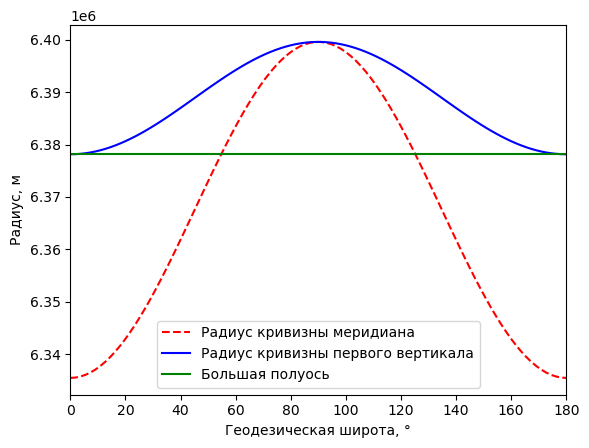

In [3]:
# GRS 80
a = 6378137 # m
e = 0.0818191910428

# генерация 100 равномерно распределённых значений широт от 0 до 90
# (попробуйте заменить на функцию np.arange, поймите разницу)
latitudes = np.linspace(0, 180, 100)

# вычисления сразу на все 100 значений широт для графика
# базовый синтаксис Python нам такое сделать не позволил бы
M = meridian_curvature_radius(latitudes, a, e)
N = prime_vertical_curvature_radius(latitudes, a, e)

# нарисовать графики, M - красный (r) прерывистый (--), N - синий (b) сплошной
plt.plot(latitudes, M, "r--", label='Радиус кривизны меридиана')
plt.plot(latitudes, N, "b", label='Радиус кривизны первого вертикала')

plt.axhline(y=a, color='g', linestyle='-', label='Большая полуось')

# наводим красоту, устанавливаем лимиты по оси абсцисс, рисуем легенду
plt.xlim(0, 180)
plt.legend()
# подписываем оси
plt.ylabel('Радиус, м')
plt.xlabel('Геодезическая широта, °')

# показать
plt.show()

**Задание**: Модифицируйте код сверху таким образом, чтобы на графике отразился радиус малой полуоси $b$.

## Преобразования координат

Из ГНСС измерений получены координаты геодезического пункта $[X, Y, Z]_t$ на эпоху измерений $t$ в последней реализации [Международной земной
системы отсчёта (ITRF)](https://itrf.ign.fr). Требуется вычислить координаты в принятой для геодезических работ на территории Российской Федерации Геодезической системе координат 2011 года (ГСК-2011), геодезические координаты на эллипсоиде ГСК-2011 и в проекции Гаусса-Крюгера в международной разграфке. Все вычисления проконтролировать обратными преобразованиями.

In [4]:
# Исходные данные

ID = "CNG1"
# Эпоха
t = 2024.0794 
# Координаты, м
x, y, z = 0.284619388640441E+07, 0.218522788605448E+07, 0.525555810468211E+07
# Скорости, м / год
vx, vy, vz = -0.021, 0.012, -0.006 

Адрес пункта: **ВПИШИТЕ СЮДА**

### Преобразование между двумя земными системами координат

Действующая государственная Геодезическая система координат 2011 года (ГСК-2011) создана встраиванием в ITRF2008: измерения с пунктов Фундаментальной астрономо-геодезической сети (ФАГС) за период 2010-2011 гг. уравнены совместно с измерениями с зарубежных и российских пунктов IGS, координаты которых приняты за исходные. Эпохой уравнивания является 1 января 2011 года, то есть
$t_0 = 2011.0$. Таким образом, **системы ITRF2008 и ГСК-2011 на эпоху 2011.0 эквивалентны**, то есть
$$
    \begin{bmatrix}
        X \\ Y \\ Z
    \end{bmatrix}^{\text{ГСК-2011}}_{t=2011.0} =
    \begin{bmatrix}
        X \\ Y \\ Z
    \end{bmatrix}^{ITRF2008}_{t=2011.0}.
$$

Не страшно, если вы не поняли значительную часть из приведённого выше текста, но к концу нашего курса понять должны. В этом задании мы будем подходить к системам координат формально в том смысле, что не будем вдаваться в сущность их различий. Но мы понимаем, что **разные названия систем координат означают разные значения координат реализующих их пунктов**, а также наличие **отличных от нуля параметров преобразования**.

Текущей версией ITRF является ITRF2020. Параметры, связывающие ITRF2020 со всеми предыдущими реализациями ITRF приведены по адресу: https://itrf.ign.fr/docs/solutions/itrf2020/Transfo-ITRF2020_TRFs.txt

Параметры в таблице соответствуют преобразованию вида
$$
\begin{equation*}
    \begin{bmatrix}
        X_S \\ Y_S \\ Z_S
    \end{bmatrix} =
    \begin{bmatrix}
        X \\ Y \\ Z
    \end{bmatrix} +
    \begin{bmatrix}
        T_x \\ T_y \\ T_z
    \end{bmatrix} +
    \begin{bmatrix}
        D & -R_z & R_y \\
        R_z & D & -R_x \\
        -R_y & R_x & D
    \end{bmatrix}
    \begin{bmatrix}
        X \\ Y \\ Z
    \end{bmatrix},
\end{equation*}
$$
где $X, Y, Z$ — координаты в ITRF2020, $X_S, Y_S, Z_S$ — координаты в другой системе,
$D$ — масштабный коэффициент, $R_x, R_y, R_z$ — малые углы поворота,
$T = \left[ T_x, T_y, T_z \right]^T$ — вектор переноса. Очевидно, что размерности должны быть проставлены верно в процессе вычисления.

Каждый параметр преобразования $P$ на эпоху $t$ можно получить из выражения
$$
\begin{equation*}
    P \left( t \right) = P\left( t_0 \right) + \dot{P} \left( t - t_0 \right),
\end{equation*}
$$
где $t_0 = 2015.0$ — начальная эпоха, на которую задан параметр $P$ и его скорость $\dot{P}$.

Таким образом, строгая последовательность преобразования следующая:
1. Приведение координат пункта от эпохи $t$ измерений к эпохе $t_0 = 2011.0$, всё в ITRF2020. При этом, координаты в этом случае стоит воспринимать как такие же параметры $P$ со скоростями $\dot{P}$  как в формуле выше, которую с умом надо применить.
2. Вычисление параметров преобразования из ITRF2020 ($t_0 = 2015.0$) в ITRF2008 ($t_0 = 2011.0$).
3. Преобразование координат из ITRF2020 в ITRF2008 на эпоху 2011.0.

Прямоугольные координаты в ГСК-2011 могут служить далее для вычисления геодезических координат, и преобразования в другие системы координат, принятые ранее у нас в стране. Или для вычисления местных координат, которые пока являются основными при выполнении большого числа топографо–геодезических работ.

In [5]:
# преобразование параметров от эпохи к эпохе
def epoch_to_epoch():
    ...

In [6]:
# здесь тест прямого и обратного преобразования epoch_to_epoch

In [7]:
# реализация семипаарметрического преобразования
# бонус: за поддержку в качестве входных numpy.array и неограниченное число входных данных
# бонус: за четырнадцатипараметрическое преобразование (с возможностью семипараметрического)

def xyz_to_xyz():
    ...

In [8]:
# здесь тест прямого и обратного преобразования функции  xyz_to_xyz

In [9]:
# здесь само преобразование (1-3 этапы)

### Преобразование прямоугольных координат $(X, Y, Z)$ в геодезические $(B, L, H)$

Функции должны поддерживать вычисление геодезических координат на любом эллипсоиде. Вычисления проводить с параметрами эллипсоида ГСК-2011.

In [10]:
def xyz_to_geodetic():
    ...

def geodetic_to_xyz():
    ...

In [11]:
# здесь тест прямого и обратного преобразования

### Преобразование геодезических координат $(B, L)$ в плоские $(x, y)$

Функции должны поддерживать вычисление на любом эллипсоиде. Вычисления проводить с параметрами эллипсоида ГСК-2011.

In [12]:
def latlon_to_gausskruger():
    ...

def gausskruger_to_latlon():
    ...

In [13]:
# здесь тест прямого и обратного преобразования